# QLSC612 assignment 

Here we explore the relation between IQ, brain size, and 'partY'.
The relation between IQ and brain has been long debated in the psychometric community, yet until now relations were week and prone to a high degree of variability.

Here we investigate the IQ-Brain size connection with it's relation to 'partY' which has been hypothesized to play a rule in the link between the mental and physical.

We conducted a careful statistical analysis using a big dataset of 40 patients, the analysis revealed the potential origin of the IQ-Brain size relationship. Results show the when controlling for the important parameter of 'partY' the connection becomes robust.

These results are the first successful attempt of demonstrating a clear robust connection between IQ and brain size.


In [1]:
## Importing packs
import pandas as pd 
import numpy as np
import statsmodels
from scipy import stats
from scipy import stats as sst
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from statsmodels.stats.anova import anova_lm
import seaborn as sns

We introduce our dataset which includes 40 patiets with 
    1. IQ messures 
    2. Body and gender characteristics 
    3. Brian size (MRI count)

In [2]:
## Read data from CSV and present a few lines 
data= pd.read_csv('brainsize.csv', sep=';', na_values='.',index_col=0) #Reading data dealing with Missing values 
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


Verbal IQ and brain size correlation, while siginifanct the correlation is low.

We wil first check that vIQ is normally distrubuted   

NormaltestResult(statistic=14.94922032200866, pvalue=0.00056730688288129)

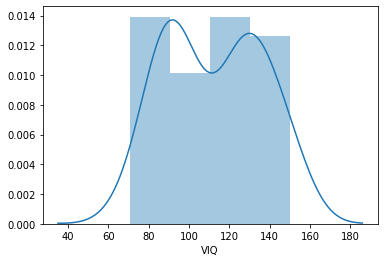

In [3]:
## Plot the distribution of the verbal IQ and check for normality 
sns.distplot(data['VIQ'])
stats.normaltest(data['VIQ'])

Which it proved not be noraml, we will check the correlation with spearman correlation

In [4]:
X= data['VIQ'] 
Y= data['MRI_Count']
stats.spearmanr(X,Y)

SpearmanrResult(correlation=0.3998136785192377, pvalue=0.010586483605577596)

Ploting the correlation between Verbal IQ and Brian size

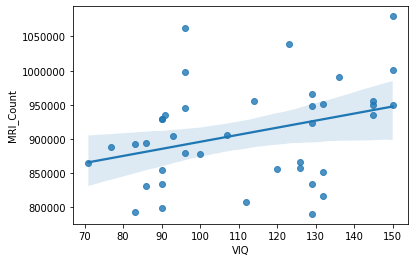

In [5]:
sns.regplot(X, Y)

# Including 'partY' as a controling factor

While the correlation between verbal IQ and brain size was significant (p<0.05) this correlation was a week (R^2 =0.15) thus not allowing a good explanation of the variance at hand.
Previous studies show that depending on the dataset this correlation can be weaker, stronger or nonexisting.

Here we present a potential root cause of these differences in measurements using 'partY'.
When controlling for this important factor the correlation between verbal IQ and brain size becomes robust and apparent.

---3D plot of the data ----

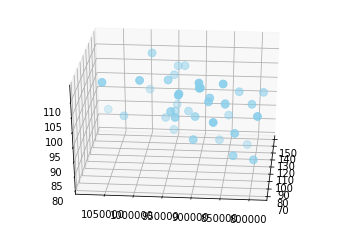

In [6]:
## Choosing a "random" seed and generate a random variable 
np.random.seed(35)
mu, sigma = 100, 10 # mean and standard deviation
partY=np.random.normal(mu, sigma,size=len(data.index))
data['partY'] = partY

## Plot the relation between VIQ - Brain Size - partY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['VIQ'], data['MRI_Count'], data['partY'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()


Using multiple regression we include 'partY' as an added factor for the brain size when correlated with the Verbal IQ scores. the regression proved signficant for both  brain size (p=0.007) and the 'partY' varible (p=0.002) were found to be highly significant
*OLS does not require a normal distribution


In [7]:
from statsmodels.formula.api import ols

model = ols('VIQ ~  MRI_Count + partY', data).fit() ## fit a linear multiple regression model 
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8.628
Date:                Thu, 21 May 2020   Prob (F-statistic):           0.000840
Time:                        10:51:14   Log-Likelihood:                -175.07
No. Observations:                  40   AIC:                             356.1
Df Residuals:                      37   BIC:                             361.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.8144     51.224      2.280      0.0

This model is successful in explaining 0.31% if the variance in the data, this robust improvement points to the importance of controlling for 'partY' when exploring the relationship between IQ and Brian size.

In [8]:
model.rsquared # display the R squared results

0.31804240648638715

An anova analysis of the model shows that it's signifianct for both predictor Brian size and 'paryY' (p=0.01, p=0.001) 

In [9]:
#Calculate ANOVA of the linear model 
anova_results = anova_lm(model)

#print('\nANOVA results')
print(anova_results)

             df        sum_sq      mean_sq          F    PR(>F)
MRI_Count   1.0   2477.259248  2477.259248   6.179233  0.017569
partY       1.0   4440.512940  4440.512940  11.076340  0.001986
Residual   37.0  14833.327812   400.900752        NaN       NaN


# Partial regression plot 

When examining the partial plots it becomes clear partY is negetivly associated with verbal IQ and while brian size is positivly crrleted with it, thus showing that the relation is more complex and may explain why when accounting for partY the association becomes robust 

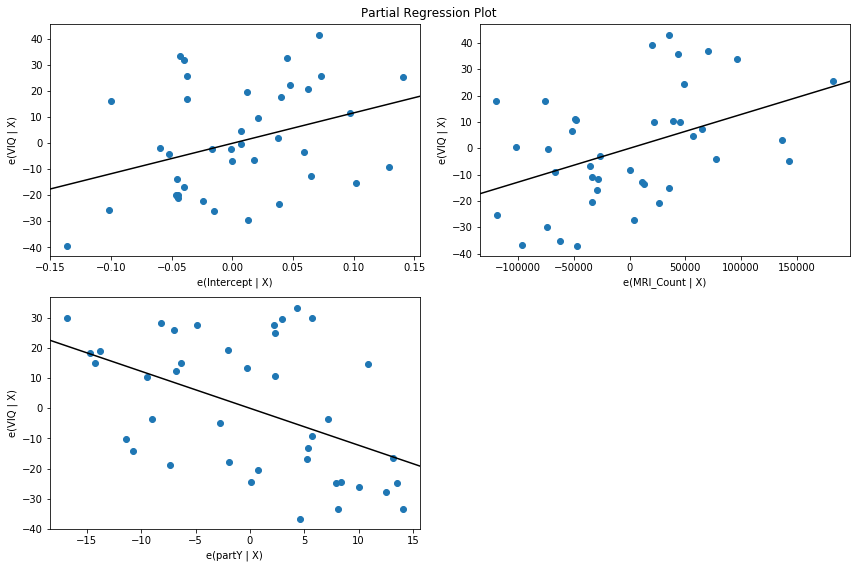

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

# Using another seed

When another seed has used the correlation when adding 'partY' results in a lack of improvement, unlike the other seed... 

In this case, the addition of of 'partY' does not improve the explained variance and we get R ^2 =0.11) similar to when we did not use this "important" parameter

In [11]:
## Choosing a "random" seed and generate a random variable 
## Repeating the analysis to check if it holds the p-value we found 
## Choosing a "random" seed and generate a random variable 
np.random.seed(8)
mu, sigma = 100, 10 # mean and standard deviation
partY2=np.random.normal(mu, sigma,size=len(data.index))
data['partY2'] = partY2

model = ols('VIQ ~  MRI_Count + partY2', data).fit() ## fit a linear multiple regression model 
print(model.summary())
model.rsquared

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.421
Date:                Thu, 21 May 2020   Prob (F-statistic):              0.103
Time:                        10:51:15   Log-Likelihood:                -180.27
No. Observations:                  40   AIC:                             366.5
Df Residuals:                      37   BIC:                             371.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8290     53.695      0.369      0.7

0.115737734653799